# Морозова Дарья, ИАД-2, дз 2

## kNN своими руками

$$ \hat{y} = \frac{\sum\limits_{i=1}^kw_iy_{(i)}}{\sum\limits_{i=1}^kw_i}, $$	

$$ d\left(x_{(i)}, x\right) = \|x_{(i)} - x\|_2 = \sqrt{\sum\limits_{j=1}^n\left(x_{(i)}^j - x^j\right)^2}\qquad\text{(евклидова)} $$$$ d\left(x_{(i)}, x\right) = \|x_{(i)} - x\|_1 = \sum\limits_{j=1}^n\left|x_{(i)}^j - x^j\right|\qquad\text{(манхэттена)} $$

In [1]:
import numpy as np

In [8]:
def emetr (a, b): #евклидова метрика
    return np.linalg.norm(b - a)
def mmetr(a,b): #манхэттенская метрика
    return np.sum(abs(b - a))

In [18]:
class KNN:
    def __init__(self, metric='euclid', k=5):
        """
        PARAMETERS:
        metric ('euclid' or 'manhattan')
        k - number of nearest neighbors
        """
        
        self.metric = metric
        self.k = k
        
        self.X_train = None
        self.y_train = None
        
    def fit(self, X_train, y_train):
        """
        INPUT:
        X_train - np.array of shape (l, d)
        y_train - np.array of shape (l,)
        """
        self.X_train = X_train
        self.y_train = y_train
        return self
        
    def predict(self, X_test):
        """
        INPUT:
        X_test - np.array of shape (m, d)
        
        OUTPUT:
        y_pred - np.array of shape (m,)
        """

        m = X_test.shape[0]
        y_pred = np.empty(m,)
        if self.metric == 'euclid':
            for i in range(m):
                x = X_test[i] #запоминаем тестовый объект
                
                #запоминаем расстояние от фиксированного объекта x до каждого другого из обучающей выборки
                # и правильный ответ на него в массив:
                nbh = [[emetr(x, self.X_train[j]), self.y_train[j]] for j in range(self.X_train.shape[0])]
                nbh.sort(key = lambda r: r[0]) #сортируем массив по возрастанию расстояния до объекта
                nbh = np.asarray(nbh[0:self.k]) #делаем срез первых k элементов
                
                #запоминаем отдельно расстояния и ответы
                d = nbh[:,0]
                a = nbh[:,1]
                
                #массив весов (обратные к расстоянию для каждого элемента)
                w = np.asarray(list(map(lambda r: 1/r if r != 0 else r, d)))
                
                 #ответ для тестового объекта
                y_pred[i] = np.dot(w, a)/(w.sum())
        elif self.metric == 'manhattan':
            for i in range(m):
                x = X_test[i]
                
                nbh = [[mmetr(x, self.X_train[j]), self.y_train[j]] for j in range(self.X_train.shape[0])]
                nbh.sort(key = lambda r: r[0])
                nbh = np.asarray(nbh[0:self.k])
                
                d = nbh[:,0]
                a = nbh[:,1]
                
                w = np.asarray(list(map(lambda r: 1/r if r != 0 else r, d)))
                
                y_pred[i] = np.dot(w, a)/(w.sum())
        return y_pred
        
        pass

In [16]:
np.random.seed(17032019)
X_train = np.random.randn(1000, 50)
y_train = np.random.randn(1000,)
X_test = np.random.randn(500, 50)
y_test = np.random.randn(500,)

Результат своего алгоритма:

In [19]:
knn = KNN()
knn.fit(X_train, y_train)
pr = knn.predict(X_test)
pr

array([-0.0634682 , -0.70276215, -0.20478242,  0.3162617 ,  0.27747363,
       -0.12660311, -0.17630427, -0.68634163, -0.16925929,  0.40155603,
        0.35648789,  0.4317387 ,  0.4160358 , -0.11200056,  0.16716772,
        0.34846154,  0.06380339, -0.1336394 ,  0.00295527, -0.11529769,
        0.89093664,  0.50056284, -0.03769162,  0.38981555,  0.40111246,
       -0.86758296,  0.01813455,  0.54741725,  0.1832918 ,  0.29794004,
       -0.31942449,  0.40525392, -0.00724322, -0.35979381, -0.29446166,
        0.09010187,  0.4473102 , -0.40545282, -0.74157053, -0.42068778,
       -0.02813289, -0.57307204, -0.26960358, -0.16182371, -0.26996389,
       -0.09907995, -0.13000152,  0.71297738,  0.35024317, -0.6013404 ,
       -0.11211203, -0.01854752,  0.30827578, -0.48292053,  0.25650166,
       -0.58849943,  0.49112277, -0.04146651, -0.51447579, -0.52011854,
        0.56131163, -0.57204562,  0.6055842 ,  0.46499869, -0.19354079,
        0.2250234 , -0.9590371 ,  0.12817738, -0.1807492 , -0.03

Результат соответствующего алгоритма из sklearn:

In [21]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 5, weights='distance')
knn.fit(X_train, y_train)
pr_sk = knn.predict(X_test)
pr_sk

array([-0.0634682 , -0.70276215, -0.20478242,  0.3162617 ,  0.27747363,
       -0.12660311, -0.17630427, -0.68634163, -0.16925929,  0.40155603,
        0.35648789,  0.4317387 ,  0.4160358 , -0.11200056,  0.16716772,
        0.34846154,  0.06380339, -0.1336394 ,  0.00295527, -0.11529769,
        0.89093664,  0.50056284, -0.03769162,  0.38981555,  0.40111246,
       -0.86758296,  0.01813455,  0.54741725,  0.1832918 ,  0.29794004,
       -0.31942449,  0.40525392, -0.00724322, -0.35979381, -0.29446166,
        0.09010187,  0.4473102 , -0.40545282, -0.74157053, -0.42068778,
       -0.02813289, -0.57307204, -0.26960358, -0.16182371, -0.26996389,
       -0.09907995, -0.13000152,  0.71297738,  0.35024317, -0.6013404 ,
       -0.11211203, -0.01854752,  0.30827578, -0.48292053,  0.25650166,
       -0.58849943,  0.49112277, -0.04146651, -0.51447579, -0.52011854,
        0.56131163, -0.57204562,  0.6055842 ,  0.46499869, -0.19354079,
        0.2250234 , -0.9590371 ,  0.12817738, -0.1807492 , -0.03

In [24]:
from sklearn.metrics import mean_squared_error
print("MSE между расчетами knn своими руками и готового алгоритма: ", mean_squared_error(pr, pr_sk))

MSE между расчетами knn своими руками и готового алгоритма:  6.34973008901757e-33


In [25]:
print("MSE между расчетами knn готового алгоритма и y_test: ", mean_squared_error(pr_sk, y_test))

MSE между расчетами knn готового алгоритма и y_test:  1.143364989935662


In [26]:
print("MSE между расчетами knn своими руками и y_test: ", mean_squared_error(pr, y_test))

MSE между расчетами knn своими руками и y_test:  1.143364989935662


Видно, что расчеты knn своими руками и готового алгоритма потчти не отличаются.

## Линейная регрессия своими руками

$$ L = \frac{1}{\ell}\sum\limits_{i=1}^\ell L_\delta\left(y_i, \hat{y}_i\right) $$

In [ ]:
class LinearRegressionHuber:
    def __init__(self, delta=1.0, max_iter=1000, tol=1e-6, eta=1e-2):
        """
        PARAMETERS:
        delta - scalar in Huber loss
        max_iter - maximum possible number of iterations in Gradient Descent
        tol - precision for stopping criterion in Gradient Descent
        eta - step size in Gradient Descent
        """
        
        self.delta = delta
        self.max_iter = max_iter
        self.tol = tol
        self.eta = eta
        
        self.w = None
        self.loss_history = None
        
    def fit(self, X_train, y_train):
        """
        INPUT:
        X_train - np.array of shape (l, d)
        y_train - np.array of shape (l,)
        """
        self.X_train = X_train
        self.y_train = y_train
        return self.loss_history
        
    def predict(self, X_test):
        """
        INPUT:
        X_test - np.array of shape (m, d)
        
        OUTPUT:
        y_pred - np.array of shape (m,)
        """

        pass
    
    def calc_gradient(self, X, y):
        """
        Calculates the gradient of Huber loss by weights.
        
        INPUT:
        X - np.array of shape (l, d)
        y - np.array of shape (l,)
        
        OUTPUT:
        grad - np.array of shape (d,)
        """
        
        pass
    
    def calc_loss(self, X, y):
        """
        Calculates the Huber loss.
        
        INPUT:
        X - np.array of shape (l, d)
        y - np.array of shape (l,)
        
        OUTPUT:
        loss - float
        """
        
        pass

## Практика

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold, SelectKBest, SelectFromModel, f_regression
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures

%matplotlib inline

In [2]:
data = pd.read_csv('train.csv', header=0)
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [149]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data.drop('Id', axis=1, inplace=True)

In [151]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Номер 1

Пропуски есть в следующих столбцах:

In [4]:
print(data.isnull().any())

MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
Street           False
Alley             True
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType        True
MasVnrArea        True
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual          True
                 ...  
BedroomAbvGr     False
KitchenAbvGr     False
KitchenQual      False
TotRmsAbvGrd     False
Functional       False
Fireplaces       False
FireplaceQu       True
GarageType        True
GarageYrBlt       True
GarageFinish      True
GarageCars       False
GarageArea       False
GarageQual 

Кол-во пропусков в столбцах:

In [6]:
f = data.isnull().sum()
f[f!=0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

Их доля от общего числа значений:

In [154]:
data.shape

(1460, 80)

In [155]:
f[f!=0]/1460

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

В столбцах Alley, PoolQC, Fence, MiscFeature больше всего пропусков

### Номер 2

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
MSSubClass       1460 non-null float64
LotFrontage      1460 non-null float64
LotArea          1460 non-null float64
OverallQual      1460 non-null float64
OverallCond      1460 non-null float64
YearBuilt        1460 non-null float64
YearRemodAdd     1460 non-null float64
MasVnrArea       1460 non-null float64
BsmtFinSF1       1460 non-null float64
BsmtFinSF2       1460 non-null float64
BsmtUnfSF        1460 non-null float64
TotalBsmtSF      1460 non-null float64
1stFlrSF         1460 non-null float64
2ndFlrSF         1460 non-null float64
LowQualFinSF     1460 non-null float64
GrLivArea        1460 non-null float64
BsmtFullBath     1460 non-null float64
BsmtHalfBath     1460 non-null float64
FullBath         1460 non-null float64
HalfBath         1460 non-null float64
BedroomAbvGr     1460 non-null float64
KitchenAbvGr     1460 non-null float64
TotRmsAbvGrd     1460 non-null floa

Удалим столбцы Alley, PoolQC, Fence, MiscFeature, тк там больше всего пропусков

In [41]:
data.drop('Alley', axis=1, inplace=True)
data.drop('PoolQC', axis=1, inplace=True)
data.drop('Fence', axis=1, inplace=True)
data.drop('MiscFeature', axis=1, inplace=True)

In [70]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


Заполним остальные пропуски:

Для столбцов с вещественными/целыми признаками - средним

In [42]:
from sklearn.impute import SimpleImputer

#создаем маску, указывающую на столбцы с категориальными признаками
mask = (data.dtypes == "object").values
d_real = data[data.columns[~mask]]
mis_replacer = SimpleImputer(strategy='mean')
d_no_miss_real = pd.DataFrame(data=mis_replacer.fit_transform(d_real), columns=d_real.columns)

Для категориальных признаков - пустыми строками

In [43]:
d_no_miss_object = data[data.columns[mask]].fillna("")

In [44]:
data = pd.concat([d_no_miss_real,d_no_miss_object], axis=1)

In [74]:
print(data.isnull().sum())

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
                ..
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional  

Пропусков больше нет :)

### Номер 3

Применяем label encoding для категориальных признаков (one-hot-encoding слишком раздувает матрицу):

In [45]:
#выделим все категориальные признаки в отдельный массив
d_object_columns = np.array(data.iloc[:, :].select_dtypes(include = ['object']).columns)
d_object_columns

array(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype=object)

In [36]:
len(d_object_columns)

39

In [46]:
from sklearn.preprocessing import LabelEncoder
#применяем LabelEncoder ко всем категориальным признакам
for i in range(len(d_object_columns)):
    data[d_object_columns[i]] = LabelEncoder().fit_transform(data[d_object_columns[i]])
print(data.shape)
data.head()

(1460, 76)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,...,2,6,0,2,2,5,5,2,8,4
1,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,...,3,6,5,2,2,5,5,2,8,4
2,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,...,2,6,5,2,2,5,5,2,8,4
3,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,...,2,6,3,6,3,5,5,2,8,0
4,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,...,2,6,5,2,2,5,5,2,8,4


### Номер 4

In [77]:
data.shape

(1460, 76)

In [47]:
data.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
MSSubClass,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022895,-0.069836,-0.065649,...,0.010129,0.003711,-0.010293,0.063761,-0.052038,-0.073844,-0.078145,-0.059925,0.012464,-0.024940
LotFrontage,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.179283,0.215828,0.043340,...,-0.189082,0.030250,0.184312,-0.179216,-0.112865,0.112053,0.107985,0.089073,-0.030846,0.058464
LotArea,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103960,0.214103,0.111170,...,-0.057018,-0.022317,0.164957,-0.090782,-0.046625,0.075409,0.080408,0.015134,0.012292,0.034169
OverallQual,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,-0.059119,...,-0.555348,0.161047,0.350537,-0.213904,-0.275131,0.280292,0.303379,0.229393,-0.060472,0.193703
OverallCond,-0.059316,-0.052820,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.127788,-0.046231,0.040229,...,0.067984,0.094040,-0.055341,0.154176,0.173026,-0.035820,-0.004295,-0.062236,0.095267,0.017758
YearBuilt,0.027850,0.117598,0.014228,0.572323,-0.375983,1.000000,0.592855,0.314745,0.249503,-0.049107,...,-0.359135,0.154368,0.207017,-0.356574,-0.342565,0.352668,0.316583,0.427561,-0.052425,0.201044
YearRemodAdd,0.040581,0.082746,0.013788,0.550684,0.073741,0.592855,1.000000,0.179186,0.128451,-0.067759,...,-0.452431,0.079903,0.130011,-0.225372,-0.313004,0.164577,0.167965,0.168457,0.019647,0.221687
MasVnrArea,0.022895,0.179283,0.103960,0.410238,-0.127788,0.314745,0.179186,1.000000,0.263582,-0.072302,...,-0.259213,0.086391,0.217562,-0.118250,-0.148106,0.159734,0.140435,0.145145,-0.055715,0.087729
BsmtFinSF1,-0.069836,0.215828,0.214103,0.239666,-0.046231,0.249503,0.128451,0.263582,1.000000,-0.050117,...,-0.191252,0.044350,0.154937,-0.192317,-0.134247,0.155891,0.140520,0.189545,0.005532,0.032855
BsmtFinSF2,-0.065649,0.043340,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072302,-0.050117,1.000000,...,0.061925,-0.101935,0.036463,-0.022524,0.051147,0.057163,0.037821,0.063940,-0.029973,-0.059092


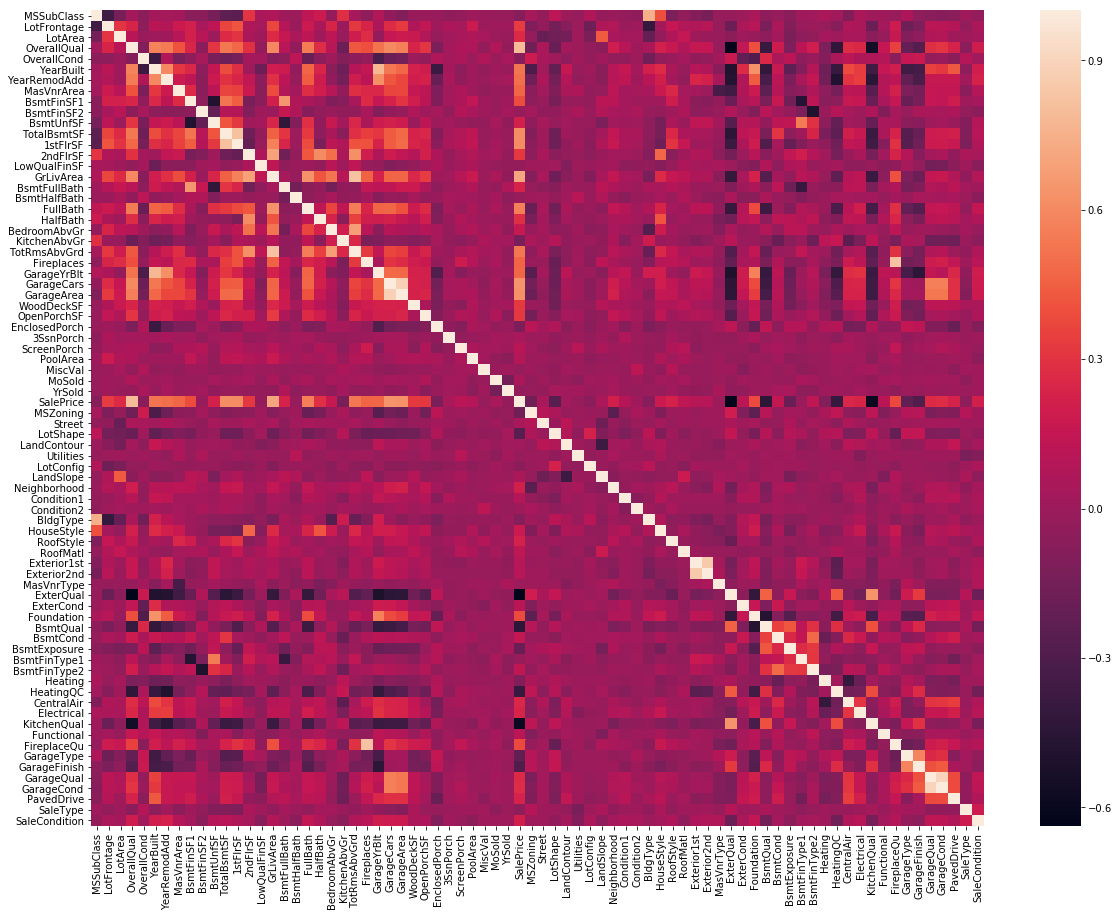

In [48]:
plt.figure(figsize = (20,15))
sns.heatmap(data.corr())

### Номер 5

Корреляции признаков с предсказываемым значением SalePrice:

In [52]:
SPcorr = data.corr().SalePrice
SPcorr = SPcorr[SPcorr != 1] #у SalePrice будет корреляция 1 с самим собой, уберем это
SPcorr

MSSubClass      -0.084284
LotFrontage      0.334901
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.475241
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.470177
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
                   ...   
Condition2       0.007513
BldgType        -0.085591
HouseStyle       0.180163
RoofStyle        0.222405
RoofMatl         0.132383
Exterior1st      0.103551
Exterior2nd      0.103766
MasVnrType  

берем корреляцию по модулю для поиска абсолютных максимумов и минимумов:

In [50]:
SPcorr = abs(SPcorr)
SPcorr[SPcorr.max() == SPcorr]

OverallQual    0.790982
Name: SalePrice, dtype: float64

In [51]:
SPcorr[SPcorr.min() == SPcorr]

MasVnrType    0.000488
Name: SalePrice, dtype: float64

#### Признак с максимальной абсолютной корреляцией с 'SalePrice' - OverallQual (0.790982)
#### С минимальной - 0.790982 (0.000488)

Визуализируем зависимости:

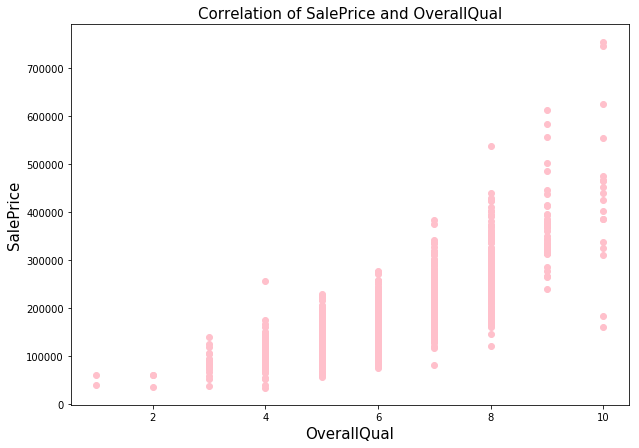

In [96]:
plt.figure(figsize = (10,7))
plt.scatter(data.OverallQual, data.SalePrice, c = 'pink')
plt.xlabel('OverallQual', fontsize = 15)
plt.ylabel('SalePrice', fontsize = 15)
plt.title('Correlation of SalePrice and OverallQual', fontsize = 15)
plt.show()

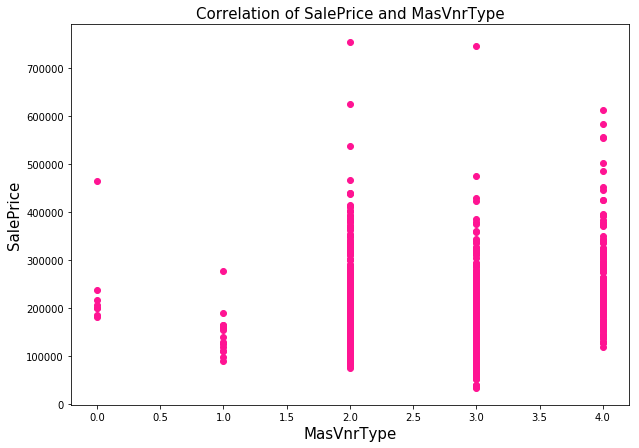

In [97]:
plt.figure(figsize = (10,7))
plt.scatter(data.MasVnrType, data.SalePrice, c = 'deeppink')
plt.xlabel('MasVnrType', fontsize = 15)
plt.ylabel('SalePrice', fontsize = 15)
plt.title('Correlation of SalePrice and MasVnrType', fontsize = 15)
plt.show()

### Номер 6

Гистограмма распределения предсказываемого значения SalePrice:

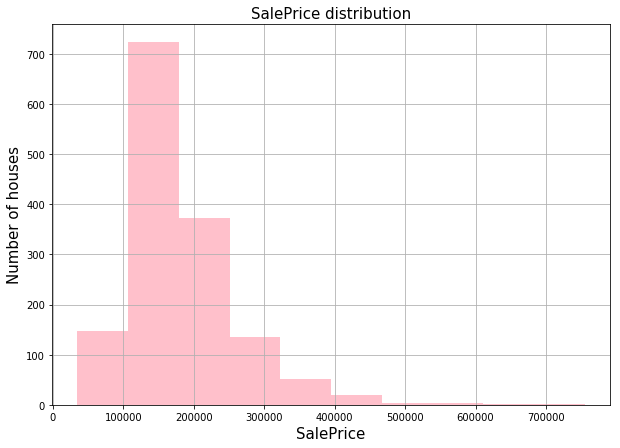

In [53]:
plt.figure(figsize = (10,7))
data.SalePrice.hist(color = 'pink')
plt.xlabel('SalePrice', fontsize = 15)
plt.ylabel('Number of houses', fontsize = 15)
plt.title('SalePrice distribution', fontsize = 15)
plt.show()

 Гистограмма распределения от нового предсказываемого значения (прологарифмированое):

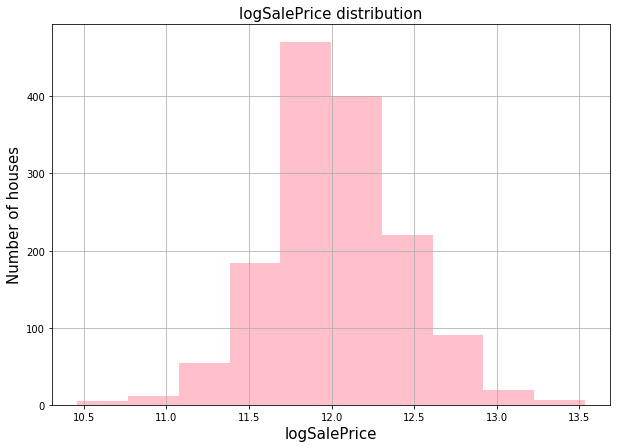

In [54]:
plt.figure(figsize = (10,7))
logSP = np.log1p(data.SalePrice)
logSP.hist(color = 'pink')
plt.xlabel('logSalePrice', fontsize = 15)
plt.ylabel('Number of houses', fontsize = 15)
plt.title('logSalePrice distribution', fontsize = 15)
plt.show()

Избавились от разницы в масштабах и смещения распределения переменной в сторону нормального.

Разобьем выборку на обучение и контроль:

In [55]:
X = data.drop('SalePrice', axis=1)
y = logSP
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=17032019)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1095, 75), (365, 75), (1095,), (365,))

### Номер 7

#### 1) knn:

Подбор гиперпараметров с помощью кросс-валидации:

In [101]:
from sklearn.model_selection import GridSearchCV
grid_searcher = GridSearchCV(
    KNeighborsRegressor(),
    param_grid={
        'n_neighbors': range(1, 40, 2),
        'weights': ['uniform', 'distance'],
        'p': [1, 2, 3]
    },
    cv = 7
)

In [102]:
grid_searcher.fit(X_train, y_train)

GridSearchCV(cv=7, error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': range(1, 40, 2), 'weights': ['uniform', 'distance'], 'p': [1, 2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Посмотрим на предсказание лучшей модели:

In [103]:
best_predictions = grid_searcher.predict(X_val)

In [104]:
print("RMSE между best_predictions и y_val: ", np.sqrt(mean_squared_error(best_predictions, y_val)))

RMSE между best_predictions и y_val:  0.19666738495377561


Лучшие гиперпараметры, найденные по кросс-валидации:

In [105]:
grid_searcher.best_params_

{'n_neighbors': 9, 'p': 1, 'weights': 'distance'}

Обучим алгоритмы с лучшими гиперпараметрами на обучающей выборке:

In [106]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 9, weights='distance')
knn.fit(X_train, y_train)
prs = knn.predict(X_val)

Оценка качество по метрике Root Mean Squared Error:

In [107]:
print("RMSE между расчетами knn и y_val: ", np.sqrt(mean_squared_error(prs, y_val)))

RMSE между расчетами knn и y_val:  0.2141999714790523


#### 2) линейная регрессия:

In [108]:
reg = LinearRegression()
reg.fit(X_train, y_train)
pr_lg = np.sqrt(-cross_val_score(reg, X_val, y_val, scoring="neg_mean_squared_error", cv = 365).mean())
print("RMSE для LinearRegression: ", np.sqrt(mean_squared_error(reg.predict(X_val), y_val)))

RMSE для LinearRegression:  0.13724522731446182


#### 3) Lasso:

In [110]:
ls = Lasso()
ls.fit(X_train,y_train)
pr_ls = np.sqrt(-cross_val_score(ls, X_val, y_val, scoring="neg_mean_squared_error", cv = 365).mean())
print("RMSE для Lasso: ", np.sqrt(mean_squared_error(ls.predict(X_val), y_val)))

RMSE для Lasso:  0.18315932692043974


#### 4) Ridge:

In [56]:
rdg = Ridge()
rdg.fit(X_train,y_train)
pr_r = np.sqrt(-cross_val_score(rdg, X_val, y_val, scoring="neg_mean_squared_error", cv = 30).mean())
print("RMSE для Ridge: ", np.sqrt(mean_squared_error(rdg.predict(X_val), y_val)))

RMSE для Ridge:  0.13710233963724533


#### Метод Ridge имеет меньшую ошибку из всех 4х методов.

### Номер 8

гистограммы значений весов для:

1) линейной регрессии

Text(0.5, 1.0, 'LinearRegression weights distribution')

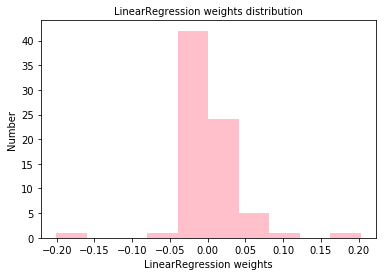

In [112]:
f, ax = plt.subplots()
ax.hist(reg.coef_, color = 'pink')
ax.set_ylabel('Number', fontsize = 10)
ax.set_xlabel('LinearRegression weights', fontsize = 10)
ax.set_title('LinearRegression weights distribution', fontsize = 10)

2) Lasso

Text(0.5, 1.0, 'Lasso weights distribution')

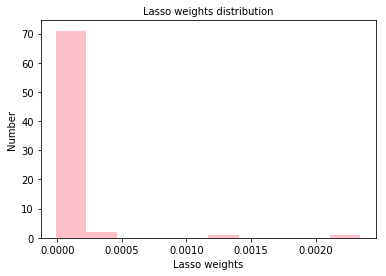

In [113]:
f, ax = plt.subplots()
ax.hist(ls.coef_, color = 'pink')
ax.set_ylabel('Number', fontsize = 10)
ax.set_xlabel('Lasso weights', fontsize = 10)
ax.set_title('Lasso weights distribution', fontsize = 10)

2) Ridge

Text(0.5, 1.0, 'Ridge weights distribution')

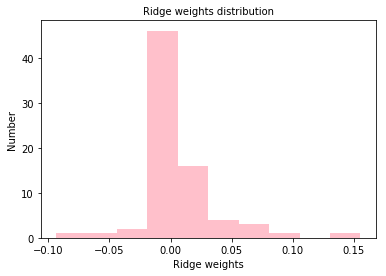

In [114]:
f, ax = plt.subplots()
ax.hist(rdg.coef_, color = 'pink')
ax.set_ylabel('Number', fontsize = 10)
ax.set_xlabel('Ridge weights', fontsize = 10)
ax.set_title('Ridge weights distribution', fontsize = 10)